# Prove that mediocre MCC value does not guarantee that none of the basic rates is low

If MCC=0.5, one of the basic rates can be quite low, for example 0.3.

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
samples = 100
stepsize = 1. / samples

tpr = 1
tnr = np.arange(0, 1 + stepsize, stepsize)
prev = np.arange(0, 1 + stepsize, stepsize)

In [3]:
# ppv = np.zeros((samples + 1, samples + 1))
# npv = np.zeros((samples + 1, samples + 1))

metrics = []

for x_idx, t in enumerate(tnr):
    for y_idx, theta in enumerate(prev):
        top = tpr * theta
        bottom = top + (1-t)*(1-theta)
        
        ppv = top / bottom
        
        curr_metrics = {'TPR': 1, 'NPV': 1, 'PPV': ppv, 'TNR': t}
        metrics.append(curr_metrics)

/home/niklas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [4]:
metrics = pd.DataFrame(metrics)
metrics = metrics.drop_duplicates()

MCC = np.sqrt(metrics.prod(axis=1)) - np.sqrt((1 - metrics).prod(axis=1))

metrics['min'] = metrics.min(axis=1)
metrics['MCC'] = MCC

In [5]:
x_val = np.arange(0, 1 + stepsize, stepsize)

Text(0,0.5,'lowest base rate')

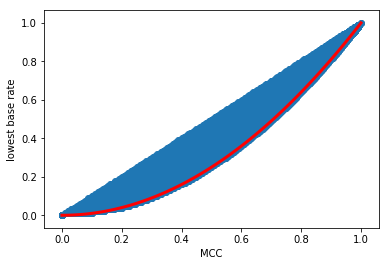

In [6]:
plt.scatter(metrics['MCC'], metrics['min'])
plt.plot(x_val, np.square(x_val), c='red', linewidth=3)
plt.xlabel('MCC')
plt.ylabel('lowest base rate')

This proves that one base rate can be quite low if MCC is mediocre.
MCC values are not directly comparable to other values. 
They need to be squared before we can compare them.